<a href="https://colab.research.google.com/github/samuelard7/ECEProject/blob/main/Final_NaiveBayes%26RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Students Academic Performance

### **KNN Model**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [7]:
df = pd.read_csv('/content/drive/MyDrive/GoogleColab/Placement_Data_Full_Class.csv')
df = df.fillna(0)
df1=df.copy()
df1.drop(['sl_no','ssc_b','hsc_b'],axis=1,inplace=True)
df1

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,60.00,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,67.00,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,66.00,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=['gender','hsc_s','degree_t','workex','specialisation','status']
for i in lst:
  df1[i]=le.fit_transform(df1[i])

df1

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,82.00,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,60.00,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,67.00,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,66.00,1,58.00,0,0,70.0,1,60.23,1,204000.0


# Scaling the **Dataset**

In [9]:
from sklearn.preprocessing import MinMaxScaler

X=df1.iloc[:,:10]
y=df1.iloc[:,-2]
ms=MinMaxScaler()
X_sc=ms.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.2,random_state=1)

## K Neighbour Classifier

In [10]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.79      0.96      0.87        28

    accuracy                           0.81        43
   macro avg       0.84      0.75      0.77        43
weighted avg       0.83      0.81      0.80        43



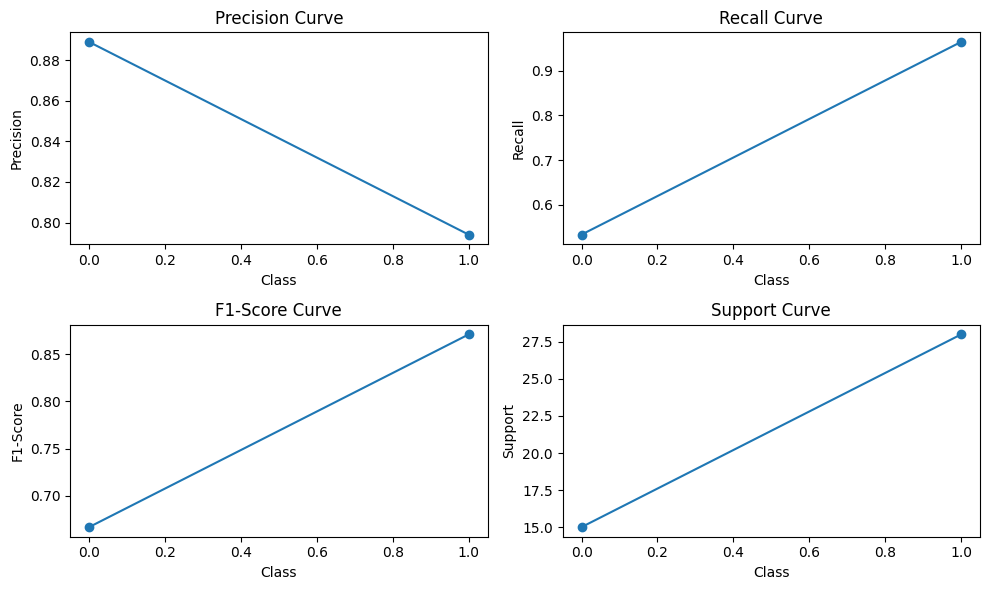

In [11]:
# prompt: create curve for precision, recall, f1-score, support with the above data

from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

# Assuming you have y_test and y_pred from your KNN model
# Replace with your actual y_test and y_pred

precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average=None)

# Create a plot for each metric
plt.figure(figsize=(10, 6))

# Precision
plt.subplot(2, 2, 1)
plt.plot(np.arange(len(precision)), precision, marker='o', label='Precision')
plt.title('Precision Curve')
plt.xlabel('Class')
plt.ylabel('Precision')

# Recall
plt.subplot(2, 2, 2)
plt.plot(np.arange(len(recall)), recall, marker='o', label='Recall')
plt.title('Recall Curve')
plt.xlabel('Class')
plt.ylabel('Recall')

# F1-Score
plt.subplot(2, 2, 3)
plt.plot(np.arange(len(f1_score)), f1_score, marker='o', label='F1-Score')
plt.title('F1-Score Curve')
plt.xlabel('Class')
plt.ylabel('F1-Score')

# Support
plt.subplot(2, 2, 4)
plt.plot(np.arange(len(support)), support, marker='o', label='Support')
plt.title('Support Curve')
plt.xlabel('Class')
plt.ylabel('Support')

plt.tight_layout()
plt.show()

###Analysis using KNN

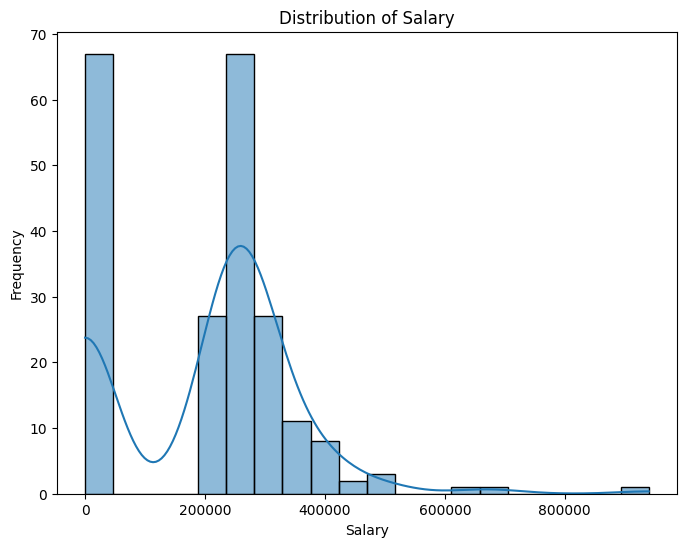

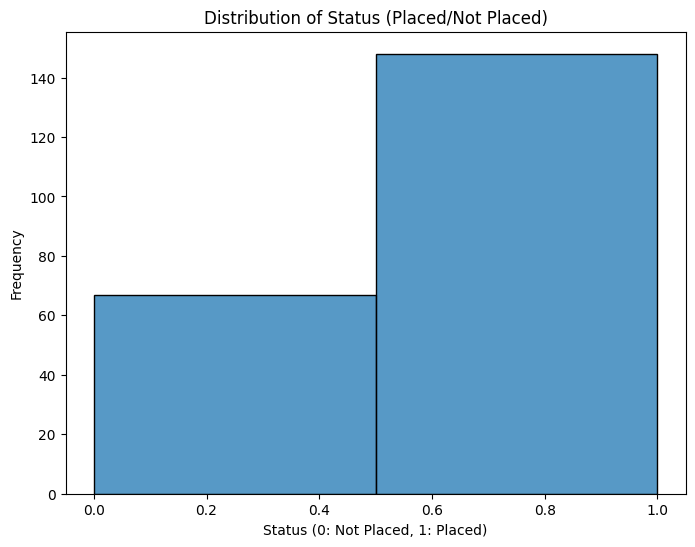

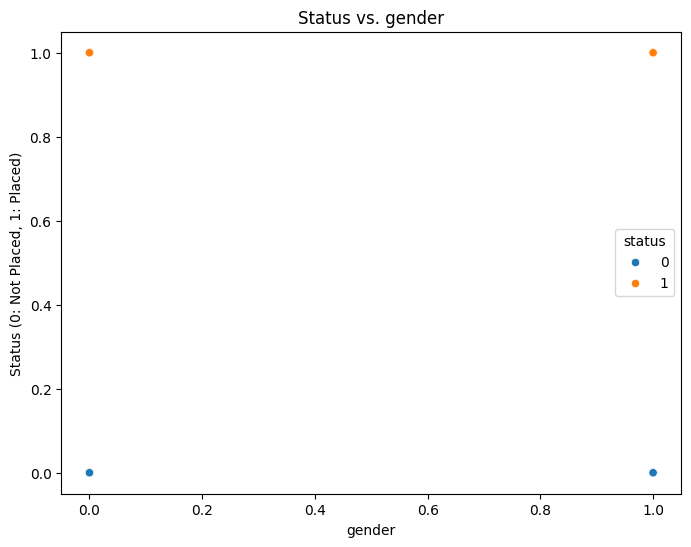

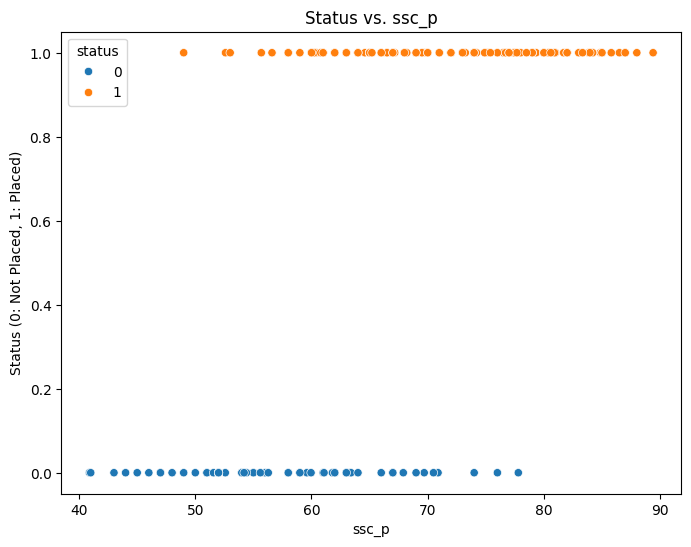

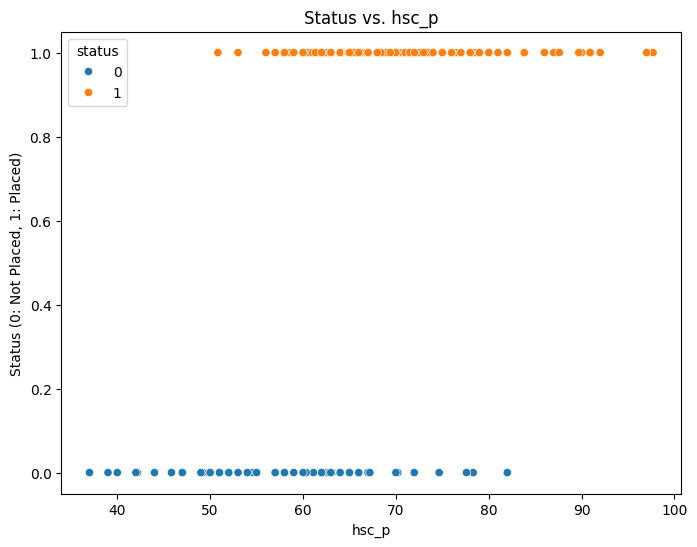

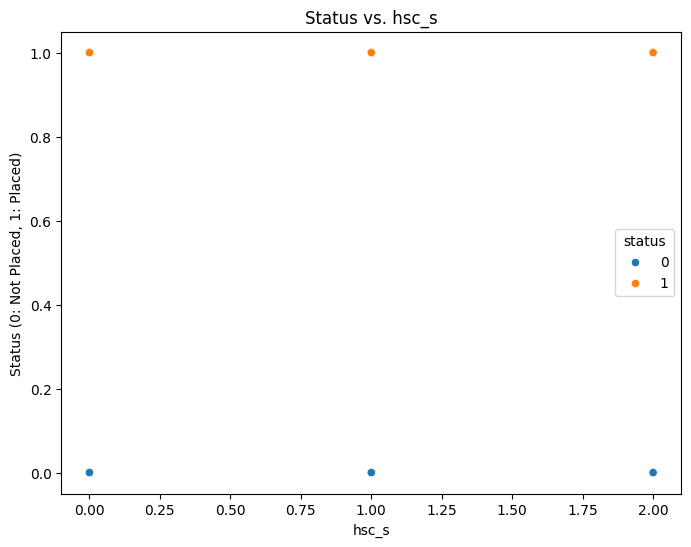

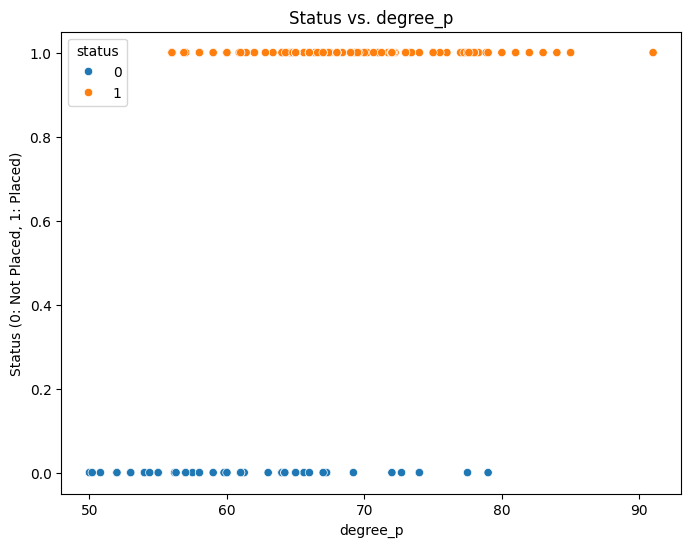

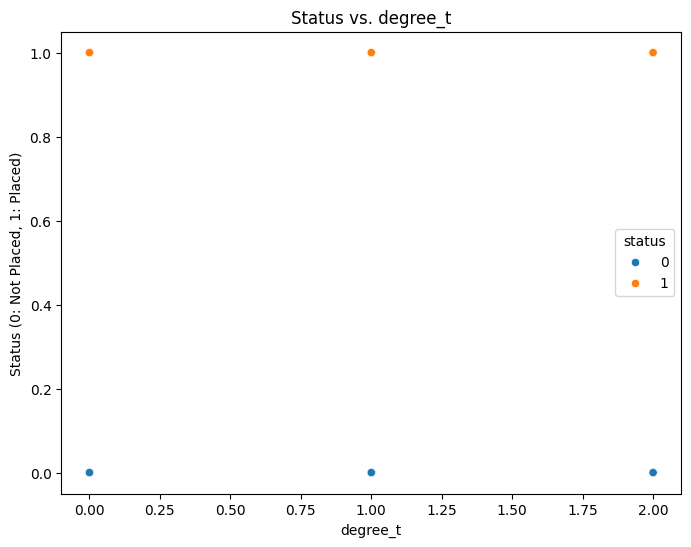

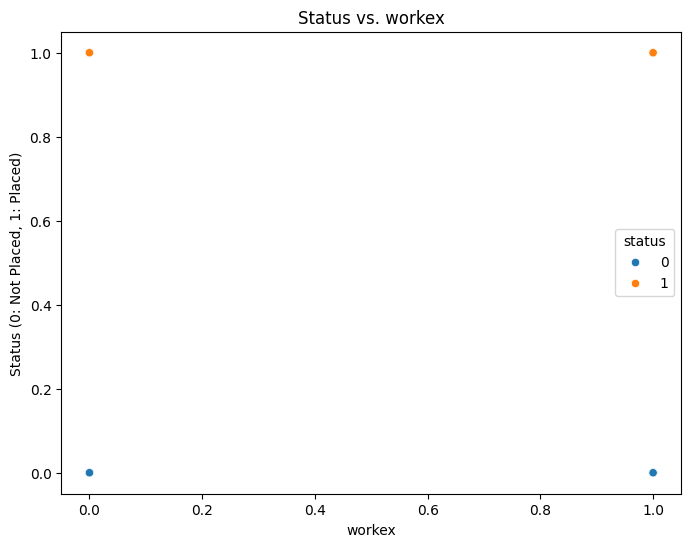

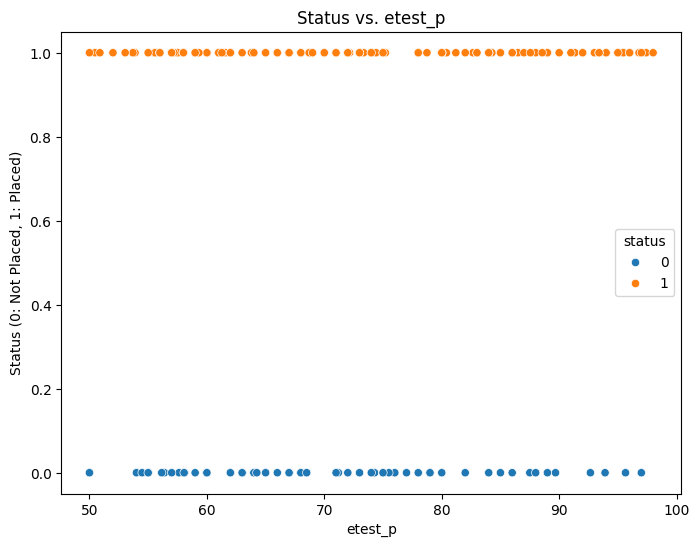

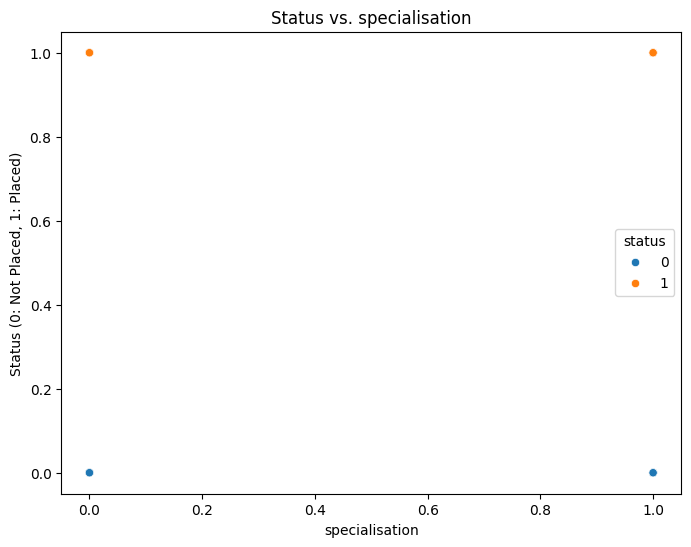

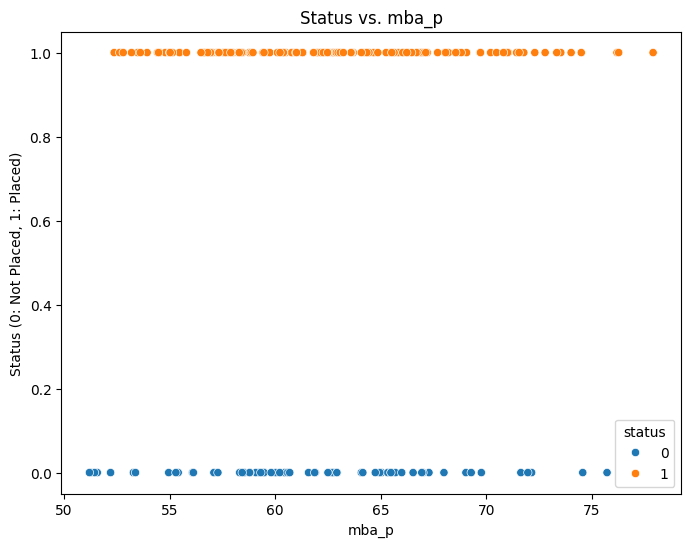

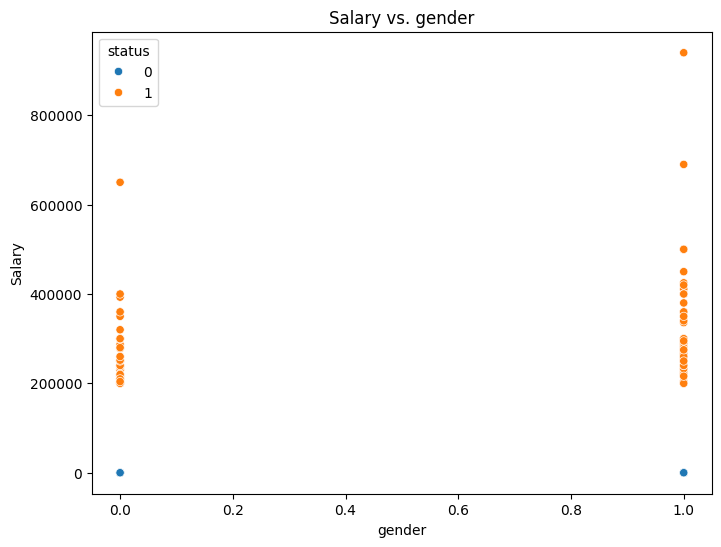

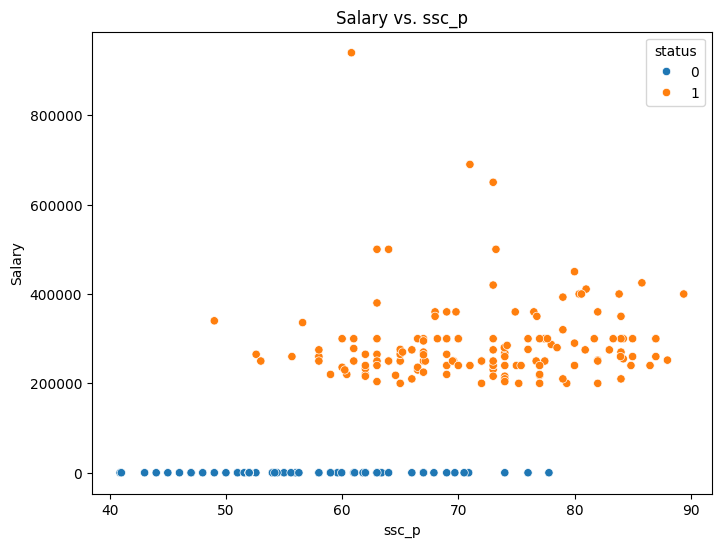

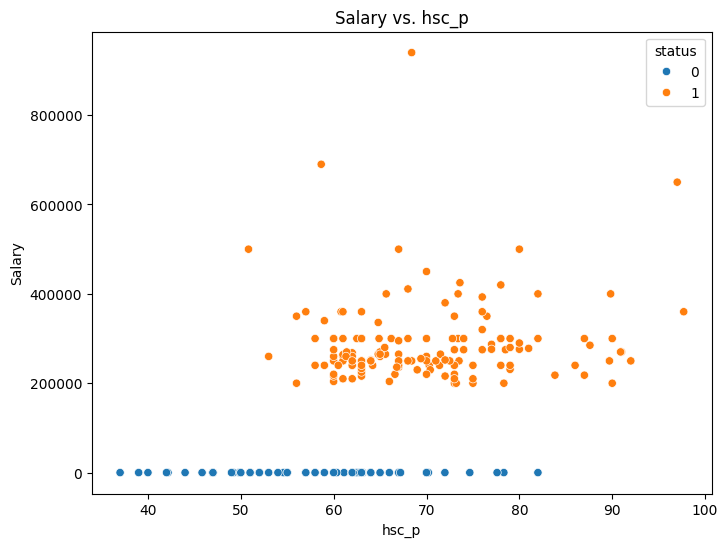

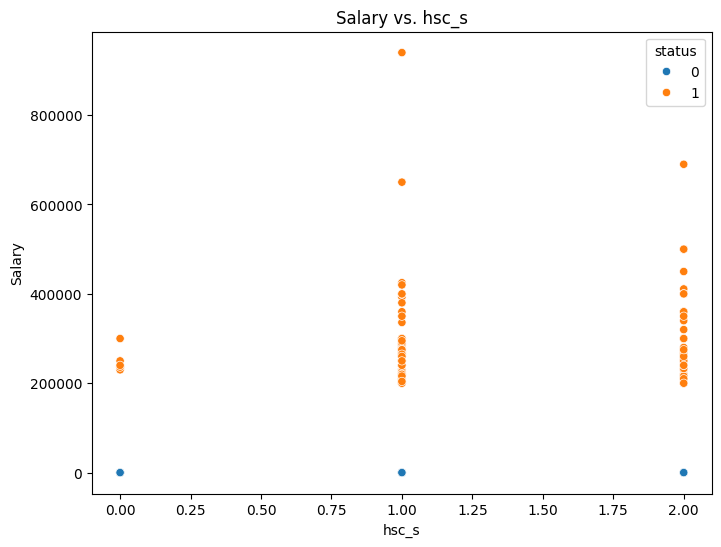

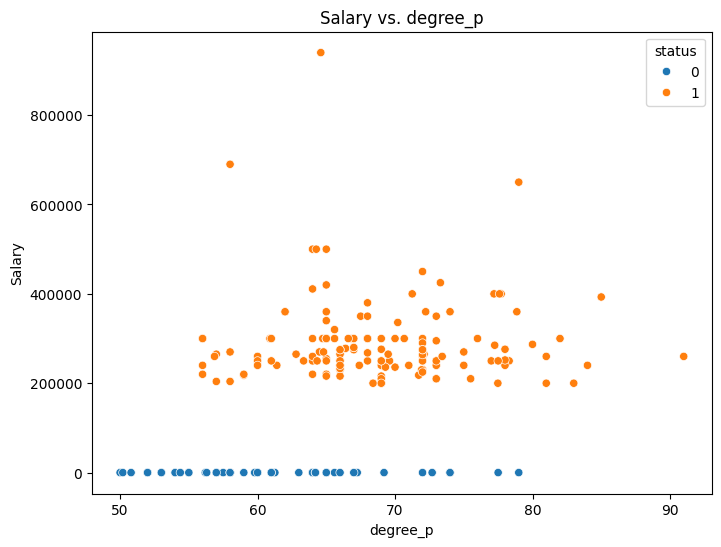

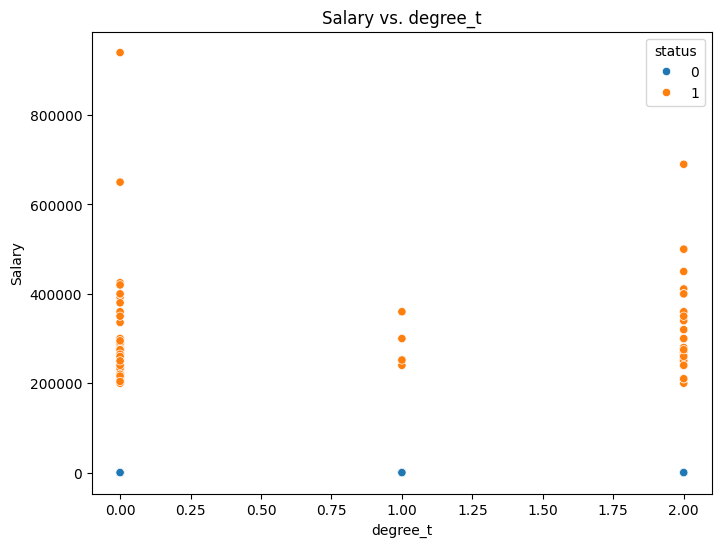

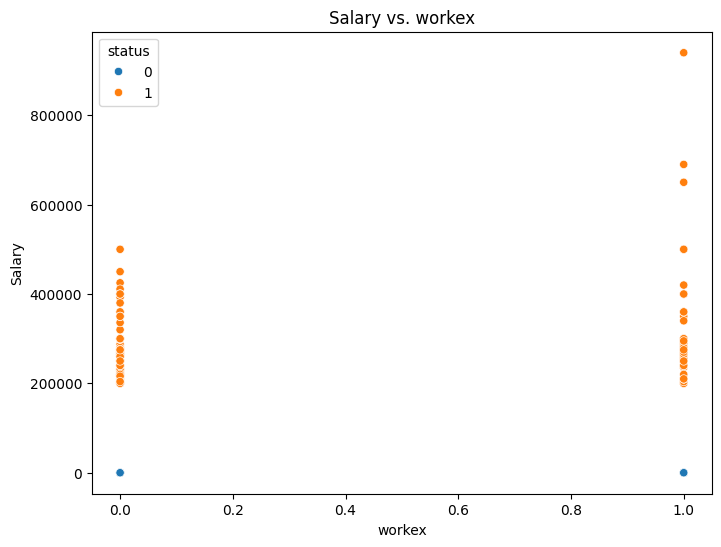

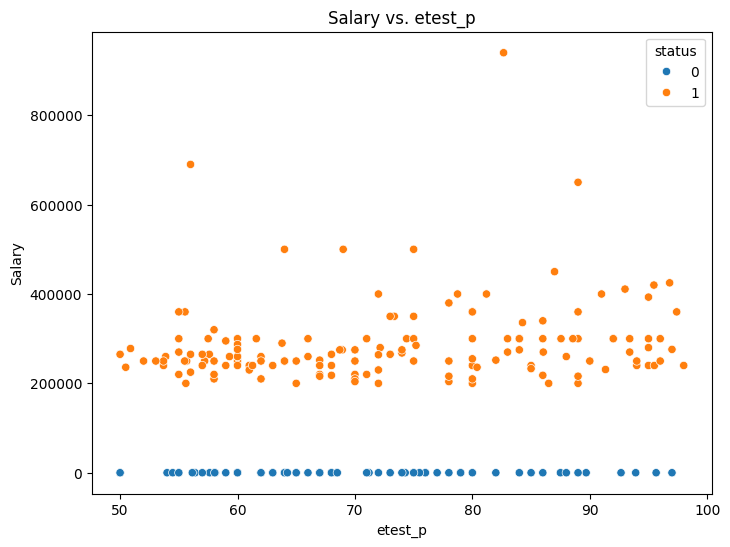

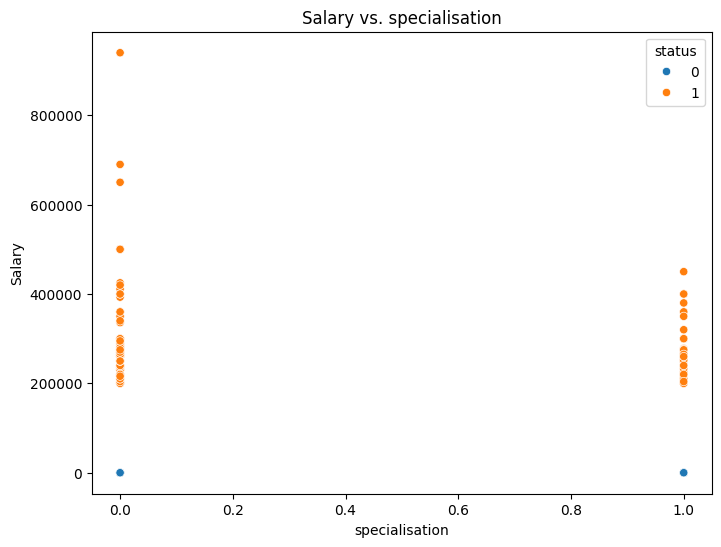

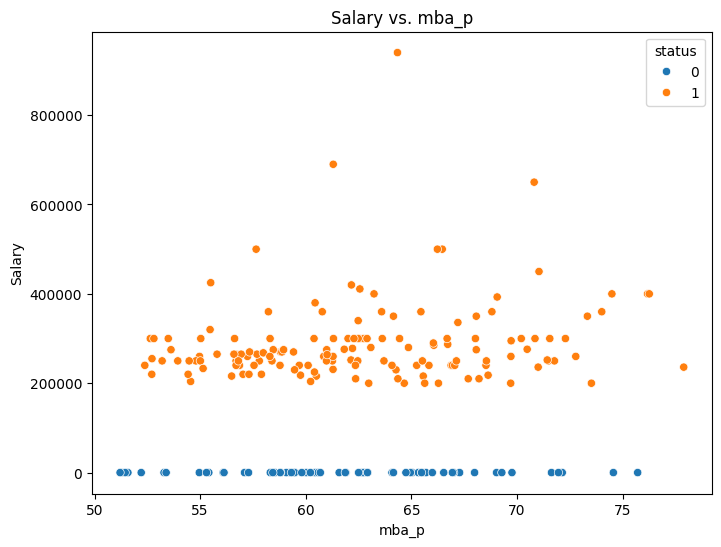

In [12]:
# prompt: generate histogram and pictogramusing knn above model - status and salary vs all other parameters, percentages use seaborn also

# Assuming df1 is your DataFrame with encoded features
# We'll analyze the relationship between 'status' and 'salary' vs other features

# Histogram for Salary
plt.figure(figsize=(8, 6))
sns.histplot(df1['salary'], bins=20, kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


# Histogram for Status
plt.figure(figsize=(8, 6))
sns.histplot(df1['status'], bins=2, kde=False)
plt.title('Distribution of Status (Placed/Not Placed)')
plt.xlabel('Status (0: Not Placed, 1: Placed)')
plt.ylabel('Frequency')
plt.show()


# Scatter plots for 'status' vs other features
for col in df1.columns:
  if col not in ['status', 'salary']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df1[col], y=df1['status'], hue=df1['status'])
    plt.title(f'Status vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Status (0: Not Placed, 1: Placed)')
    plt.show()


# Scatter plots for 'salary' vs other features
for col in df1.columns:
  if col not in ['status', 'salary']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df1[col], y=df1['salary'], hue=df1['status'])
    plt.title(f'Salary vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Salary')
    plt.show()


# Percentage calculations and visualizations could be added based on specific needs
# For example, you could calculate the percentage of placed students for different values of a feature
# and then visualize this using a bar chart or a pie chart.

# Example: Percentage of placed students based on degree type
# degree_type_counts = df1.groupby(['degree_t', 'status'])['status'].count().unstack()
# degree_type_percentages = degree_type_counts.div(degree_type_counts.sum(axis=1), axis=0) * 100
# degree_type_percentages.plot(kind='bar', stacked=True)
# plt.title('Percentage of Placed Students by Degree Type')
# plt.xlabel('Degree Type')
# plt.ylabel('Percentage')
# plt.show()



# Pictogram using a library like matplotlib or seaborn
# You can represent the counts of placed and not placed students using a pictogram,
# such as a bar chart where the height of the bar corresponds to the count,
# and each bar is replaced with a small image representing the status.

# I can provide more specific code examples if you have particular questions about the analysis
# or if you want to visualize certain aspects of the dataset in detail.

# Naive Bayes

## Naïve Bayes is a probabilistic classifier that uses Bayes' theorem to predict events. It's a simple, fast, and easy algorithm that works well for large datasets.

In [13]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred2=nb.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.86      0.89      0.88        28

    accuracy                           0.84        43
   macro avg       0.82      0.81      0.82        43
weighted avg       0.84      0.84      0.84        43



#Understanding Precision, Recall, F1-score, and Support in Machine Learning Evaluation - Source: Medium
https://medium.com/@nirajan.acharya777/understanding-precision-recall-f1-score-and-support-in-machine-learning-evaluation-7ec935e8512e

##Precision

###Precision measures the proportion of true positive predictions among all positive predictions made by the model. It is calculated as the ratio of true positives to the sum of true positives and false positives.

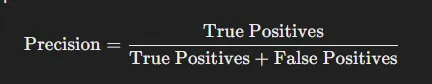

###Precision indicates how many of the predicted positive instances are actually positive. A high precision indicates that the model is making few false positive predictions.

##Recall (Sensitivity)

###Recall measures the proportion of true positive predictions among all actual positive instances in the dataset. It is calculated as the ratio of true positives to the sum of true positives and false negatives.

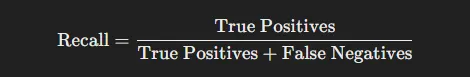

###Recall indicates how many of the actual positive instances the model is able to correctly identify. A high recall indicates that the model is capturing most of the positive instances in the dataset.

##F1-score

###F1-score is the harmonic mean of precision and recall. It provides a single metric that combines both precision and recall, balancing the trade-off between the two. It is calculated as:

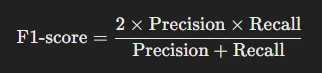

###F1-score considers both false positives and false negatives, making it a useful metric for imbalanced datasets where precision and recall may be skewed.

##Support

###Support refers to the number of actual occurrences of the class in the dataset. It is the number of instances in each class.